In [2]:
from sklearn.datasets import make_classification #built-in dataset from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [39]:
#create x and y variable from dataset

X, y = make_classification(n_samples = 9000, n_features=18, n_informative = 4, n_redundant = 12, random_state = 4)

In [40]:
#split data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [41]:
#create empty list for test scores
train_scores, test_scores = list(), list()

In [42]:
#create values, we want to predict 21 values
values = [i for i in range(1,21)]

In [43]:
#for loop for model and decision
for i in values:
    model = DecisionTreeClassifier(max_depth=i) #check how model performs at different depths
    model.fit(X_train,y_train) #fit our model
    train_yhat = model.predict(X_train) #calculate predicted values from training data
    train_acc = accuracy_score(y_train, train_yhat) #calculate accuracy score of prediction from training data
    test_yhat = model.predict(X_test) #do the same for test dataset
    test_acc =  accuracy_score(y_test, test_yhat)
    train_scores.append(train_acc) #append these new calculated scores to our empty list
    test_scores.append(test_acc)
    print('%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc)) #print incoming train and test scores, leave 3 decimal places, for different value of i, see what the train accuracy and test accuracy will be

1, train: 0.839, test: 0.830
2, train: 0.856, test: 0.843
3, train: 0.880, test: 0.864
4, train: 0.907, test: 0.890
5, train: 0.916, test: 0.900
6, train: 0.932, test: 0.904
7, train: 0.966, test: 0.934
8, train: 0.974, test: 0.936
9, train: 0.980, test: 0.934
10, train: 0.984, test: 0.934
11, train: 0.986, test: 0.931
12, train: 0.989, test: 0.928
13, train: 0.991, test: 0.936
14, train: 0.994, test: 0.933
15, train: 0.995, test: 0.932
16, train: 0.997, test: 0.931
17, train: 0.997, test: 0.934
18, train: 0.999, test: 0.934
19, train: 0.999, test: 0.934
20, train: 1.000, test: 0.936


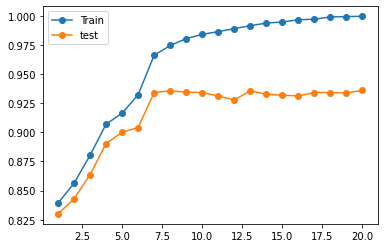

In [44]:
#Plot the various accuracies for each of the tests
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='test')
pyplot.legend()
pyplot.show()

## Notes

Here we see that the low accracy range for train is around 83% and for test it is 82%
There is a scope for impovement but there is also accuracy, therfore this is underfitting at the lower depths

Additionally we see there is overfitting at the high depths, around 17-20 (near 100% accuracy on training data)
Meanwhile the test is performing poorly (93% accuracy)


## Preventing Overfitting

In [45]:
#import cross validation (gridsearch)
from sklearn.model_selection import GridSearchCV

#there are other methods, increase training dataset, remove unwanted attributes, regularization, boosting

In [46]:
#creating param_grid
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth':[2 ,4 ,6 , 10, 20], 'min_samples_split': [5 ,10 ,20 ,50 , 100]}
#perform a grid search
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, n_jobs = -1, scoring = "accuracy") #using cross validation of 3
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [47]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

In [48]:
print(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))

0.9755555555555555
0.937037037037037


In [ ]:
#We see that for sample set 10 we had a difference ~ 4%, now the difference has been reduced to ~3%

#We want to make the difference as small as possible, so we would normally continue to finetune
#once the difference is sufficently small, we can say we have "solved" the overfitting problem.

#usually in underfitting, we just use a different model or increase training size data